# Mount Drive 

In [28]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [49]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# **Q1) 1) read and display images**

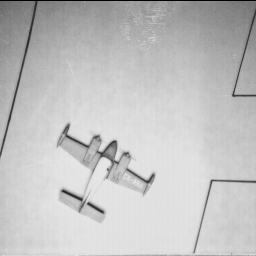

In [56]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/5.1.11.tiff',0)
cv2_imshow(img)

# **Q1) 2) maximum and minimum pixel values of I and Resolution of I**

In [51]:
smallest = np.amin(img)
biggest = np.amax(img)
print("Smallest pixel value ",smallest)
print("Largest pixel value ",biggest)

Smallest pixel value  0
Largest pixel value  232


In [52]:
dimensions = img.shape
height = img.shape[0]
width = img.shape[1]
print('Image Dimensions    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Image Resolution    : ',height,'x',width)

Image Dimensions    :  (256, 256)
Image Height       :  256
Image Width        :  256
Image Resolution    :  256 x 256


# **Q1) 3**

Size of the image downloaded

In [61]:
image = '/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/5.1.11.tiff'
size_compressed = os.path.getsize(image)
print("Size of image is: ",(width*height))

Size of image is:  65536


Efficient ratio 

In [ ]:
size_grey = height*width
ratio = size_compressed/size_grey
print('ratio= ',ratio)

ratio=  1.002044677734375


# **Q1) 4) bitplane**

In [31]:
def bitplane(img,k):
  plane = np.full((img.shape[0], img.shape[1]), 2 ** k, np.uint8)
  res = cv2.bitwise_and(plane, img)
  x = res * 255
  return x

bitplane from b = 0 to 7

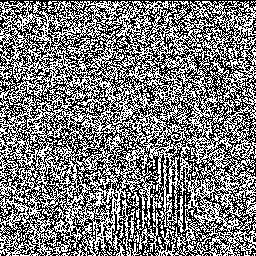

In [32]:
img_bitplane = bitplane(img,0)
cv2_imshow(img_bitplane)

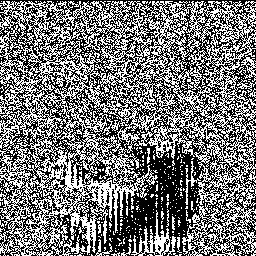

In [33]:
img_bitplane = bitplane(img,1)
cv2_imshow(img_bitplane)

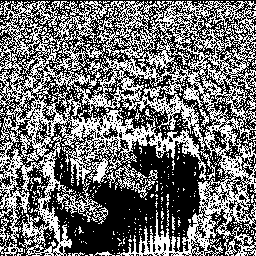

In [34]:
img_bitplane = bitplane(img,2)
cv2_imshow(img_bitplane)

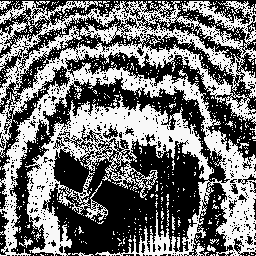

In [35]:
img_bitplane = bitplane(img,3)
cv2_imshow(img_bitplane)

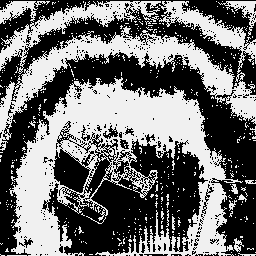

In [36]:
img_bitplane = bitplane(img,4)
cv2_imshow(img_bitplane)

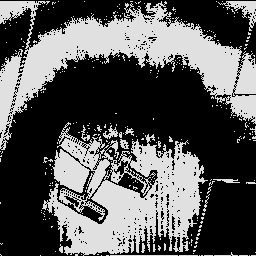

In [37]:
img_bitplane = bitplane(img,5)
cv2_imshow(img_bitplane)

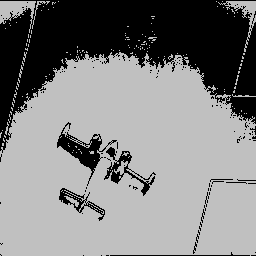

In [38]:
img_bitplane = bitplane(img,6)
cv2_imshow(img_bitplane)

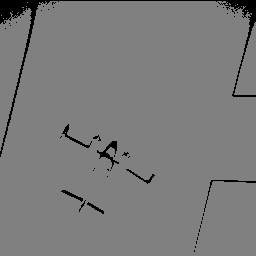

In [39]:
img_bitplane = bitplane(img,7)
cv2_imshow(img_bitplane)

# **Q1) 5) quantization**

In [54]:
def quantization (L,i_min,i_max,img):
  q = (i_max-i_min)/L
  t = np.zeros(L+1)
  r = np.zeros(L)
  t[0]=i_min
  t[L]=i_max
  k=0
  for i in range(1,L):
    t[i]=t[i-1]+q
    r[i]=t[i]+(q/2)
  for i in range (0,img.shape[0]):
    for j in range (0,img.shape[1]):
      f=img[i][j]
      for k in range (0,L):
        if (f>=t[k] and f<t[k+1]):
            img[i][j]=r[k]
  return img

Quantization for 1,2,4,8 bits

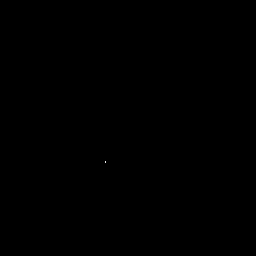

In [55]:
new_img=quantization(1,smallest,biggest,img)
cv2_imshow(new_img)

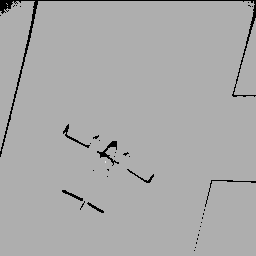

In [57]:
new_img=quantization(2,smallest,biggest,img)
cv2_imshow(new_img)

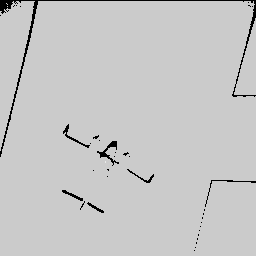

In [58]:
new_img=quantization(4,smallest,biggest,img)
cv2_imshow(new_img)

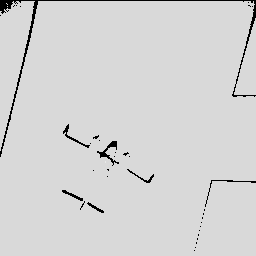

In [59]:
new_img=quantization(8,smallest,biggest,img)
cv2_imshow(new_img)

# **Q2) 1) read RGB image and display each channel seperately and convert RGB image to a grayscale image**

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/fg1.jpg')
print('Image Dimensions :', img.shape)

Image Dimensions : (490, 735, 3)


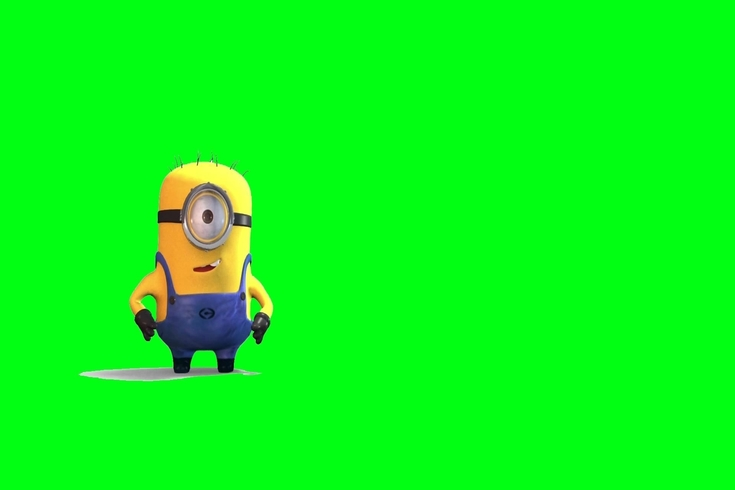

In [ ]:
cv2_imshow(img)

In [ ]:
def channel_separate(img,i):
  channel_separate = img[:,:,i]
  img_color = np.zeros(img.shape)
  img_color[:,:,i] = channel_separate
  cv2_imshow(img_color)

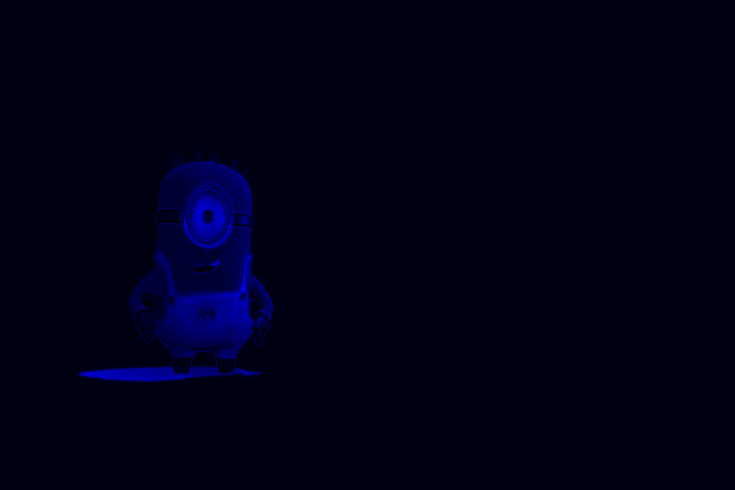

In [ ]:
#print blue channel
channel_separate(img,0)

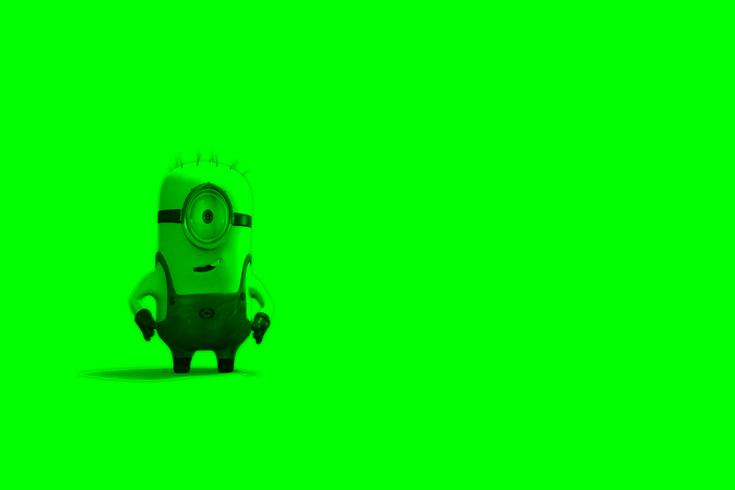

In [ ]:
#print green channel
channel_separate(img,1)

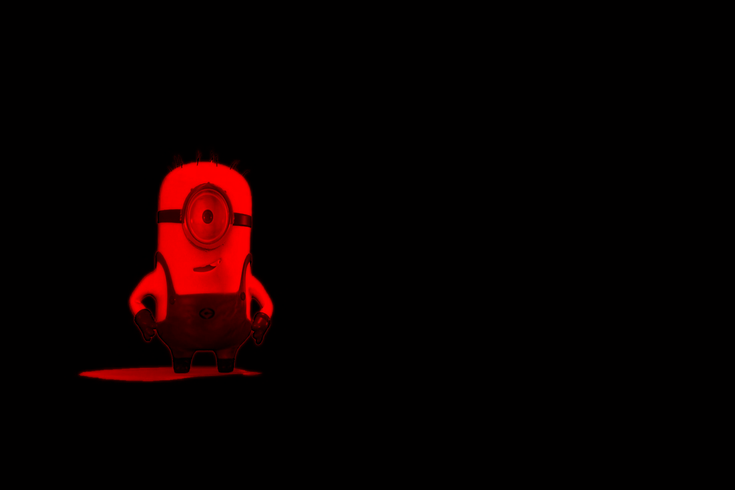

In [ ]:
#print red channel
channel_separate(img,2)

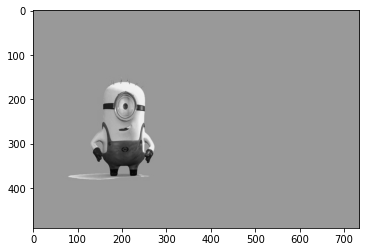

In [ ]:
#rgb to grey
orignal = mpimg.imread('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/fg1.jpg')
R, G, B = orignal[:,:,0], orignal[:,:,1], orignal[:,:,2]
gsi = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(gsi, cmap='gray')
plt.show()

# **Q2) 2) the most frequently occurring color from  the image**

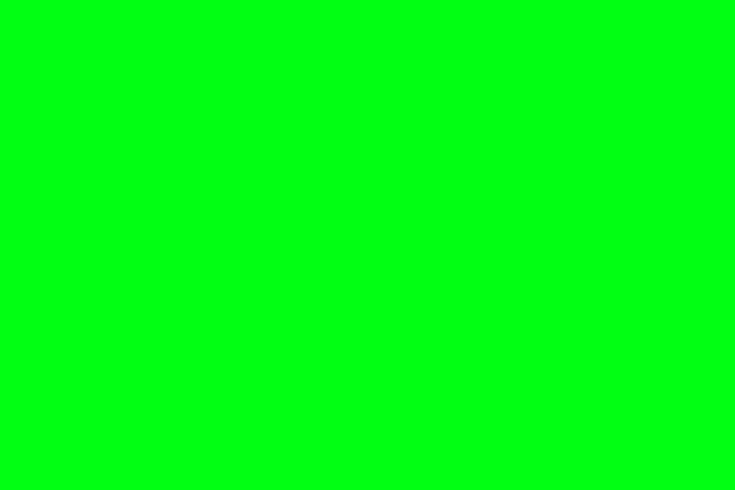

In [ ]:
import numpy as np
img_temp = img.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]
#print(img_temp.shape)
cv2_imshow(img_temp)

# **Q2) 3) Foreground and backgroud image**

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/fg1.jpg')
bg = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/bg.jpg')

In [ ]:
print(img.shape)
print(bg.shape)

(490, 735, 3)
(720, 1280, 3)


In [ ]:
img_temp2 = img.copy()
def frequent_color():
  for i in range (0,img_temp.shape[0]):
    for j in range (0,img_temp.shape[1]):
      for k in range (0,img_temp.shape[2]):
        if (img_temp2[i][j][k]== img_temp[i][j][k]):
          img_temp2[i][j][k] = bg[i][j][k]



In [ ]:
frequent_color()

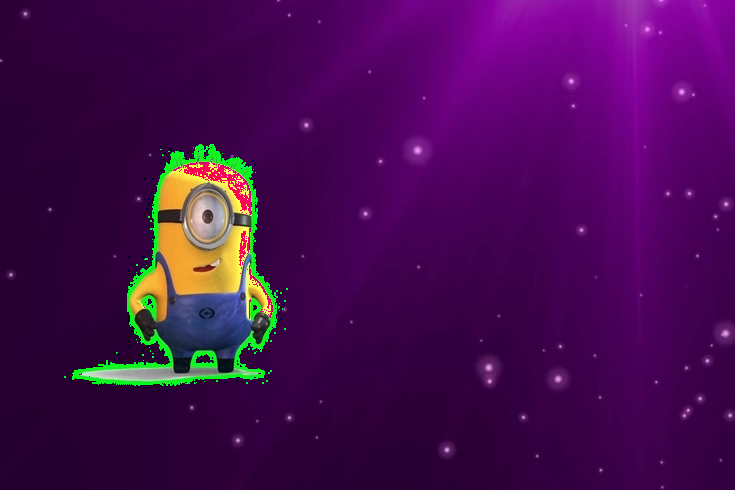

In [ ]:
cv2_imshow(img_temp2)

# **Q3) 1) extract the frames from the video**

In [ ]:
cam = cv2.VideoCapture("/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/ee608_bird_video_.mp4")
  
try:

    if not os.path.exists('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video'):
        os.makedirs('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video')

except OSError:
    print ('Error: Creating directory of data')
  
currentframe = 0
while(True):

    ret,frame = cam.read()
  
    if ret:

        name = '/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name)

        cv2.imwrite(name, frame)

    else:
        break

cam.release()
cv2.destroyAllWindows()

Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame0.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame1.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame2.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame3.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame4.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame5.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame6.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame7.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame8.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame9.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame10.jpg
Creating.../content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame11.jpg


# **Q3) 2) Quantize the extracted frames with desired number of bits convert the images back to a video**

In [ ]:
def quantization (L,i_min,i_max,img):
  q = (i_max-i_min)/L
  t = np.zeros(L+1)
  r = np.zeros(L)
  t[0]=i_min
  t[L]=i_max
  k=0
  for i in range(1,L):
    t[i]=t[i-1]+q
    r[i]=t[i]+(q/2)
  for i in range (0,img.shape[0]):
    for j in range (0,img.shape[1]):
      f=img[i][j]
      for k in range (0,L):
        if (f>=t[k] and f<t[k+1]):
            img[i][j]=r[k]
  return img

Quantizing the frames with L=2 as my compute power is less

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
path = '/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video'
frame = 0
for image in os.listdir(path):
  name = '/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Video/frame' + str(frame) + '.jpg'
  img = cv2.imread(name)
  #cv2_imshow(img)
  blue = quantization(2,0,255,img[:,:,0])
  green = quantization(2,0,255,img[:,:,1])
  red = quantization(2,0,255,img[:,:,2])
  final = cv2.merge((blue,green,red))
  name_ = '/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Final/frame' + str(frame) + '.jpg'
  cv2.imwrite(name_,final)
  frame += 1

Converting the frames to video

In [ ]:
import glob

img_array = []
for filename in glob.glob('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Final/frame*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Final/butterfly.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [19]:
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Final/frame0.jpg')
img.shape

(810, 1440, 3)

Displaying the video

In [26]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

def display_video(video):
    fig = plt.figure(figsize=(3,3))  

    mov = []
    for i in range(len(video)):
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    plt.close()
    return anime

In [27]:
video = imageio.mimread('/content/drive/MyDrive/Colab_Notebooks/CS608/HW_0_data/Final/butterfly.mp4')  
HTML(display_video(video).to_html5_video())  